<a href="https://colab.research.google.com/github/0Sensei2/Data-Mining/blob/main/Prediksi_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install xgboost scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ganti path di bawah dengan path ke file kamu
file_path = '/content/drive/MyDrive/Prediksi/tes.csv'

df = pd.read_csv(file_path)
print(df.head())  # opsional, tampilkan 5 data pertama

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [5]:
df_reg = df.drop(columns=["ID", "age_desc", "relation"])  # kita prediksi kolom 'result'

# 3. Encode data kategorikal
label_encoders = {}
for column in df_reg.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_reg[column] = le.fit_transform(df_reg[column])
    label_encoders[column] = le

# 4. Pisahkan fitur dan target
X = df_reg.drop("result", axis=1)
y = df_reg["result"]

# 5. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42)

# 6. Inisialisasi semua model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
}


In [6]:
# Evaluasi tiap model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"===== {name} =====")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f} ({r2 * 100:.2f}%)\n")


===== Random Forest =====
MAE: 0.3944
MSE: 0.9853
RMSE: 0.9926
R-squared: 0.9470 (94.70%)

===== XGBoost =====
MAE: 0.6512
MSE: 1.2881
RMSE: 1.1349
R-squared: 0.9307 (93.07%)



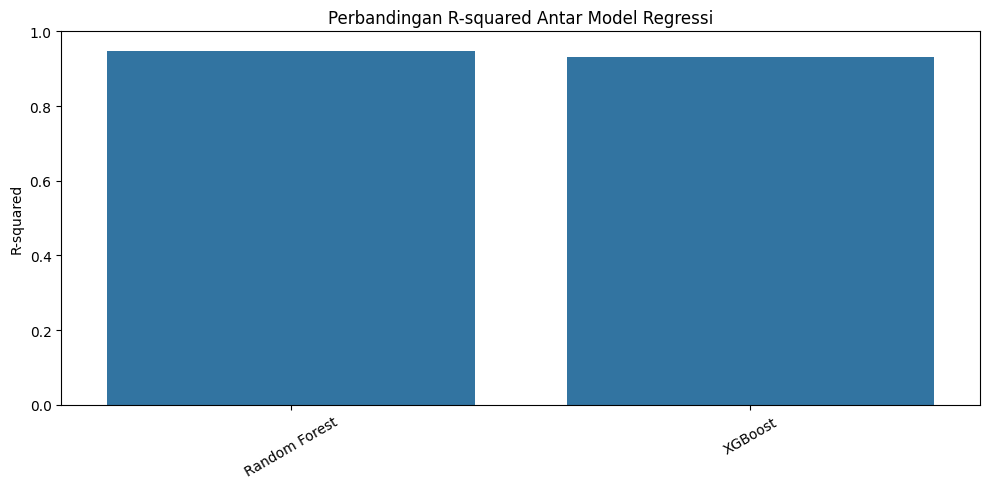

In [7]:
# 8. Visualisasi R-squared semua model
model_names = list(results.keys())
r2_scores = [results[m]["R2"] for m in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores)
plt.title("Perbandingan R-squared Antar Model Regressi")
plt.ylabel("R-squared")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

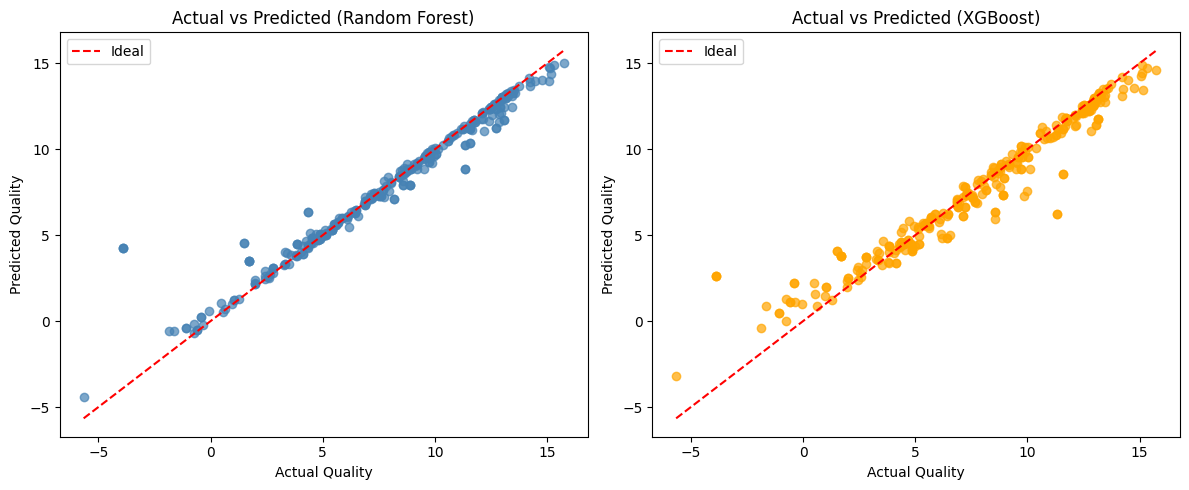

In [8]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# ===== 4. Scatter Plot =====
plt.figure(figsize=(12, 5))

# Plot untuk Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, color='steelblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()

# Plot untuk XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_pred, color='orange', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted (XGBoost)')
plt.legend()

plt.tight_layout()
plt.show()

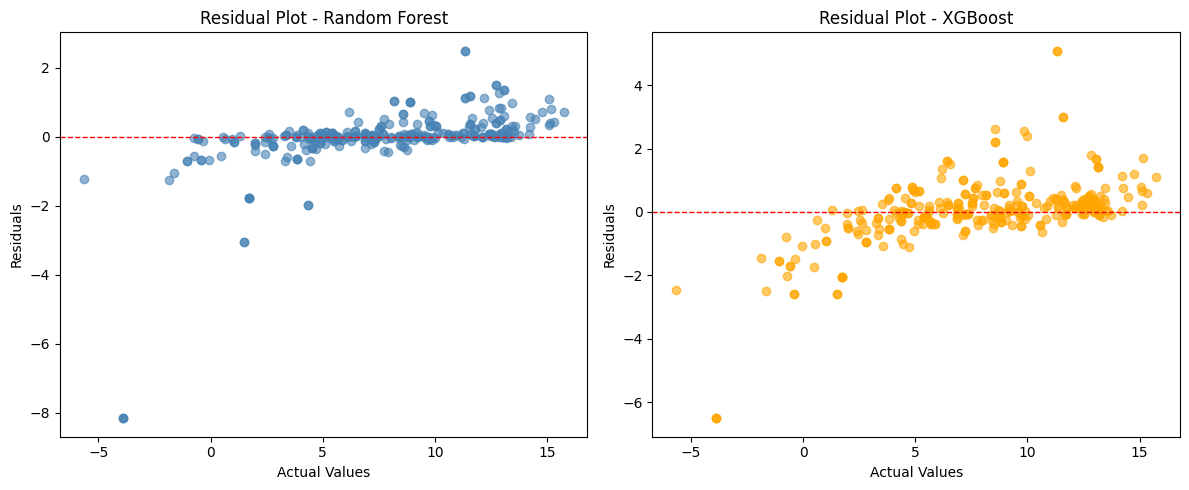

In [9]:
# ===== 3. Train Models =====
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_residuals = y_test - rf_pred

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_residuals = y_test - xgb_pred

# ===== 4. Residual Plot =====
plt.figure(figsize=(12, 5))

# Residual Plot - Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_residuals, color='steelblue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot - Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

# Residual Plot - XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot - XGBoost")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Persiapkan dataset
df_reg = df.copy()
df_reg = df_reg.drop(columns=["ID", "age_desc", "relation"])

# 2. Encode semua kolom kategorikal
for col in df_reg.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])

# 3. Fitur dan target
X = df_reg.drop("result", axis=1)
y = df_reg["result"]

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.17, random_state=42
)

# 5. Train model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 6. Train model XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 7. Ambil 10 data acak
random_indices = np.random.choice(len(X_test), size=10, replace=False)

# 8. Buat DataFrame perbandingan
compare_df = pd.DataFrame({
    'Actual': y_test.values[random_indices],
    'RandomForest_Predicted': rf_pred[random_indices],
    'XGBoost_Predicted': xgb_pred[random_indices]
})

# 9. Tambahkan kolom 'Keterangan' untuk masing-masing model
compare_df["RF_Keterangan"] = np.where(
    abs(compare_df["Actual"] - compare_df["RandomForest_Predicted"]) <= 0.5, "Benar", "Salah"
)

compare_df["XGB_Keterangan"] = np.where(
    abs(compare_df["Actual"] - compare_df["XGBoost_Predicted"]) <= 0.5, "Benar", "Salah"
)

# 10. Tampilkan hasil
print(compare_df.round(2))


   Actual  RandomForest_Predicted  XGBoost_Predicted RF_Keterangan  \
0    7.67                    7.60               7.38         Benar   
1    4.80                    4.80               4.42         Benar   
2   10.72                   10.68              10.44         Benar   
3    7.96                    7.07               7.63         Salah   
4   13.07                   10.95              12.27         Salah   
5    5.13                    5.32               6.07         Benar   
6    5.10                    5.25               5.34         Benar   
7   12.44                   12.31              11.54         Benar   
8    7.12                    7.11               6.46         Benar   
9    7.59                    7.39               7.10         Benar   

  XGB_Keterangan  
0          Benar  
1          Benar  
2          Benar  
3          Benar  
4          Salah  
5          Salah  
6          Benar  
7          Salah  
8          Salah  
9          Benar  


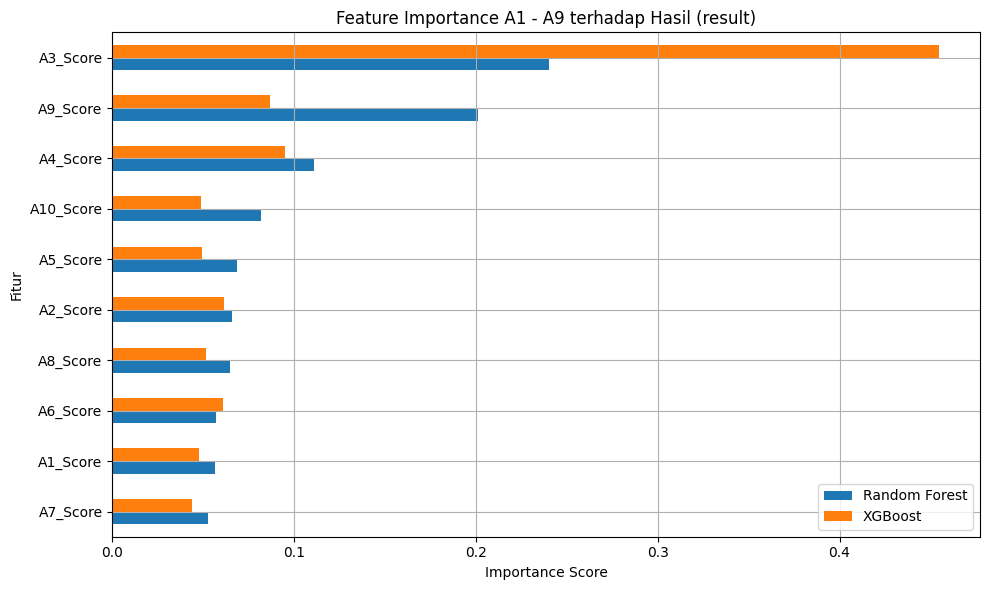

In [11]:
# Label Encoding untuk kolom kategorikal (jika ada)
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Ambil fitur A1 - A9 saja
feature_cols = [col for col in df.columns if "A" in col and "_Score" in col]
X = df[feature_cols]
y = df["result"]

# ===== 2. Split Data =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# ===== 3. Train Model - Random Forest =====
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# ===== 4. Train Model - XGBoost =====
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
xgb_importance = xgb.feature_importances_

# ===== 5. Visualisasi Feature Importance =====
# Buat dataframe untuk visualisasi
feat_imp_df = pd.DataFrame({
    'Fitur': feature_cols,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}).set_index('Fitur')

# Plot
feat_imp_df.sort_values('Random Forest', ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance A1 - A9 terhadap Hasil (result)')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.grid(True)
plt.tight_layout()
plt.show()